Data loaded successfully!


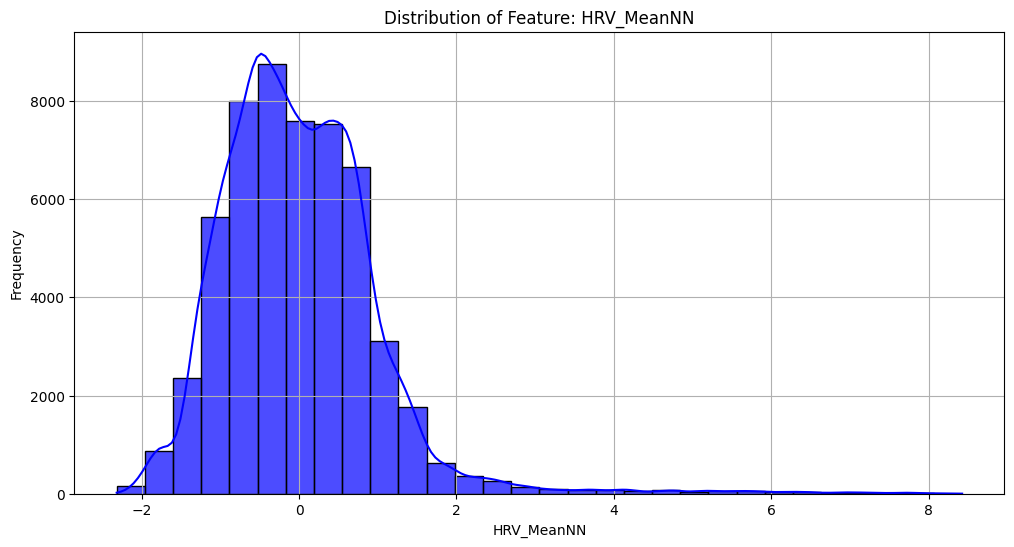

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define base directory
BASE_DIR = r"D:\Amrita\Sem-4\Machine Learning Lab\End Sem Project\Excel\5. Splitting"

def load_data():
    files = ["X_train.csv", "y_train.csv", "X_test.csv", "y_test.csv"]
    file_paths = {file: os.path.join(BASE_DIR, file) for file in files}

    # Check if files exist
    for file, path in file_paths.items():
        if not os.path.exists(path):
            raise FileNotFoundError(f"Error: {file} not found in {BASE_DIR}")

    # Load data
    X_train = pd.read_csv(file_paths["X_train.csv"])
    y_train = pd.read_csv(file_paths["y_train.csv"]).values.ravel()
    X_test = pd.read_csv(file_paths["X_test.csv"])
    y_test = pd.read_csv(file_paths["y_test.csv"]).values.ravel()

    return X_train, y_train, X_test, y_test

def plot_feature_distribution(X_train, y_train):
    plt.figure(figsize=(12, 6))
    
    # Select the first feature (or modify based on feature count)
    feature = X_train.columns[0]  

    # Plot distribution
    sns.histplot(X_train[feature], bins=30, kde=True, color="blue", alpha=0.7)
    
    plt.title(f"Distribution of Feature: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Load data and plot
try:
    X_train, y_train, X_test, y_test = load_data()
    print("Data loaded successfully!")

    # Plot feature distribution
    plot_feature_distribution(X_train, y_train)

except FileNotFoundError as e:
    print(e)



🔹 Loading the split data...

⚠ Feature names in X_Train and X_Test do not match! Reordering X_Test...

🔹 Applying PCA...


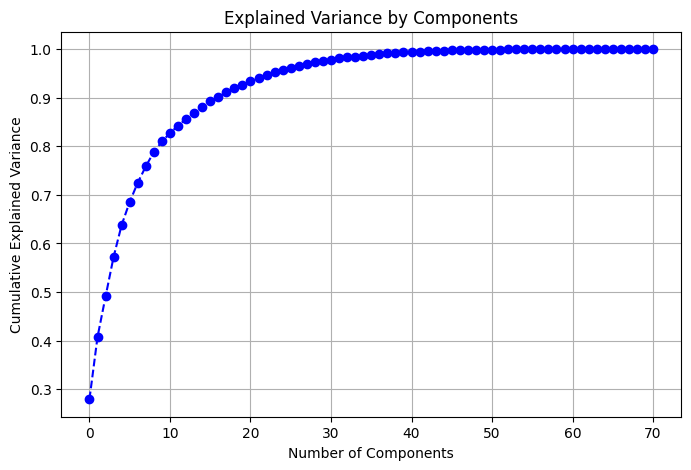


✅ Selected 24 principal components.

🎯 Model Accuracy after PCA: 0.8168


In [11]:
# ========================== IMPORT LIBRARIES ==========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ========================== LOAD DATA ==========================
print("\n🔹 Loading the split data...")

train_x_file = r"D:\Amrita\Sem-4\Machine Learning Lab\End Sem Project\Excel\5. Splitting\X_Train.csv"
train_y_file = r"D:\Amrita\Sem-4\Machine Learning Lab\End Sem Project\Excel\5. Splitting\Y_Train.csv"
test_x_file = r"D:\Amrita\Sem-4\Machine Learning Lab\End Sem Project\Excel\5. Splitting\X_Test.csv"
test_y_file = r"D:\Amrita\Sem-4\Machine Learning Lab\End Sem Project\Excel\5. Splitting\Y_Test.csv"

X_train = pd.read_csv(train_x_file)
y_train = pd.read_csv(train_y_file).values.ravel()  # Convert to 1D array
X_test = pd.read_csv(test_x_file)
y_test = pd.read_csv(test_y_file).values.ravel()

# ========================== REMOVE EXTRA COLUMN IF NEEDED ==========================
for df_name, df in zip(["X_train", "X_test"], [X_train, X_test]):
    if "Unnamed: 0" in df.columns:
        df.drop(columns=["Unnamed: 0"], inplace=True)
        print(f"⚠ Removed extra column 'Unnamed: 0' from {df_name}")

# Ensure columns match in train and test sets
if list(X_train.columns) != list(X_test.columns):
    print("\n⚠ Feature names in X_Train and X_Test do not match! Reordering X_Test...")
    X_test = X_test[X_train.columns]  # Reorder X_Test to match X_Train

# ========================== STANDARDIZE DATA ==========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========================== APPLY PCA ==========================
print("\n🔹 Applying PCA...")

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# ========================== PLOT EXPLAINED VARIANCE ==========================
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid()
plt.show()

# ========================== SELECT OPTIMAL NUMBER OF COMPONENTS ==========================
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1  # Select components covering 95% variance

print(f"\n✅ Selected {n_components} principal components.")

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# ========================== TRAIN MODEL WITH PCA ==========================
model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n🎯 Model Accuracy after PCA: {accuracy:.4f}")